In [26]:
from __future__ import print_function

from pyalgotrade import strategy
from pyalgotrade.barfeed import quandlfeed
from pyalgotrade.technical import ma


class MyStrategy(strategy.BacktestingStrategy):
    def __init__(self, feed, instrument, stmaPeriod, ltmaPeriod):
        super(MyStrategy, self).__init__(feed, 1000)
        self.__position = None
        self.__instrument = instrument
        # We'll use adjusted close values instead of regular close values.
        self.setUseAdjustedValues(True)
        self.__stma = ma.SMA(feed[instrument].getPriceDataSeries(), stmaPeriod)
        self.__ltma = ma.SMA(feed[instrument].getPriceDataSeries(), ltmaPeriod)

    def onEnterOk(self, position):
        execInfo = position.getEntryOrder().getExecutionInfo()
        self.info("BUY at $%.2f" % (execInfo.getPrice()))

    def onEnterCanceled(self, position):
        self.__position = None

    def onExitOk(self, position):
        execInfo = position.getExitOrder().getExecutionInfo()
        self.info("SELL at $%.2f" % (execInfo.getPrice()))
        self.__position = None

    def onExitCanceled(self, position):
        # If the exit was canceled, re-submit it.
        self.__position.exitMarket()

    def onBars(self, bars):
        # Wait for enough bars to be available to calculate a SMA.
        if self.__ltma[-1] is None:
            return

        bar = bars[self.__instrument]
        # If a position was not opened, check if we should enter a long position.
        if self.__position is None:
            # if the short term moving averge is greater than the long term moving average, we buy the stock
            if self.__stma[-1] > self.__ltma[-1]:
                # Enter a buy market order for 10 shares. The order is good till canceled.
                self.__position = self.enterLong(self.__instrument, 10, True)
        # Check if we have to exit the position.
        # if the long term moving average is greater than the short term moving average, we sell the stock
        elif self.__stma[-1] < self.__ltma[-1] and not self.__position.exitActive():
            self.__position.exitMarket()


def run_strategy(stmaPeriod, ltmaPeriod):
    # Load the bar feed from the CSV file which is all the historical stock data for APPL from the years listed below
    feed = quandlfeed.Feed()
    feed.addBarsFromCSV("aapl", "WIKI-AAPL-2009-quandl.csv")
    feed.addBarsFromCSV("aapl", "WIKI-AAPL-2010-quandl.csv")
    feed.addBarsFromCSV("aapl", "WIKI-AAPL-2011-quandl.csv")
    feed.addBarsFromCSV("aapl", "WIKI-AAPL-2012-quandl.csv")
    feed.addBarsFromCSV("aapl", "WIKI-AAPL-2013-quandl.csv")
    feed.addBarsFromCSV("aapl", "WIKI-AAPL-2014-quandl.csv")
    feed.addBarsFromCSV("aapl", "WIKI-AAPL-2015-quandl.csv")
    #Testing to see if we can add multiple stocks...DISREGARD for now
    #feed.addBarsFromCSV("aapl", "WIKI-FB-2009-quandl.csv")
    #feed.addBarsFromCSV("aapl", "WIKI-FB-2010-quandl.csv")
    #feed.addBarsFromCSV("aapl", "WIKI-FB-2011-quandl.csv")
    #feed.addBarsFromCSV("aapl", "WIKI-FB-2012-quandl.csv")
    #feed.addBarsFromCSV("aapl", "WIKI-FB-2013-quandl.csv")
    #feed.addBarsFromCSV("aapl", "WIKI-FB-2014-quandl.csv")
    #feed.addBarsFromCSV("aapl", "WIKI-FB-2015-quandl.csv")

    # Evaluate the strategy with the feed.
    myStrategy = MyStrategy(feed, "aapl", stmaPeriod, ltmaPeriod)
    print("Initial portfolio value: $%.2f" % myStrategy.getBroker().getEquity())
    myStrategy.run()
    print("Final portfolio value: $%.2f" % myStrategy.getBroker().getEquity())

run_strategy(10,100)

2009-05-28 00:00:00 strategy [INFO] BUY at $17.15
2010-02-09 00:00:00 strategy [INFO] SELL at $25.24
2010-02-22 00:00:00 strategy [INFO] BUY at $26.00
2010-08-20 00:00:00 strategy [INFO] SELL at $32.05
2010-09-14 00:00:00 strategy [INFO] BUY at $34.21
2011-04-15 00:00:00 strategy [INFO] SELL at $42.83
2011-04-28 00:00:00 strategy [INFO] BUY at $44.49
2011-05-20 00:00:00 strategy [INFO] SELL at $43.64
2011-07-11 00:00:00 strategy [INFO] BUY at $45.79
2011-11-22 00:00:00 strategy [INFO] SELL at $47.68
2011-12-14 00:00:00 strategy [INFO] BUY at $49.70
2011-12-20 00:00:00 strategy [INFO] SELL at $49.83
2011-12-22 00:00:00 strategy [INFO] BUY at $51.02
2012-10-31 00:00:00 strategy [INFO] SELL at $76.78
2013-06-05 00:00:00 strategy [INFO] BUY at $58.51


Initial portfolio value: $1000.00


2013-06-18 00:00:00 strategy [INFO] SELL at $56.66
2013-07-29 00:00:00 strategy [INFO] BUY at $57.87
2014-02-06 00:00:00 strategy [INFO] SELL at $68.20
2014-02-19 00:00:00 strategy [INFO] BUY at $72.84
2014-03-04 00:00:00 strategy [INFO] SELL at $71.00
2014-03-31 00:00:00 strategy [INFO] BUY at $72.10
2014-04-09 00:00:00 strategy [INFO] SELL at $69.88
2014-04-29 00:00:00 strategy [INFO] BUY at $79.39
2015-07-01 00:00:00 strategy [INFO] SELL at $121.53
2015-07-24 00:00:00 strategy [INFO] BUY at $120.02
2015-07-30 00:00:00 strategy [INFO] SELL at $117.14
2015-11-04 00:00:00 strategy [INFO] BUY at $118.45
2015-12-21 00:00:00 strategy [INFO] SELL at $103.65


Final portfolio value: $1785.78


2009-02-17 00:00:00 strategy [INFO] BUY at $12.44
2009-03-10 00:00:00 strategy [INFO] SELL at $10.91
2009-03-25 00:00:00 strategy [INFO] BUY at $13.83
2009-07-09 00:00:00 strategy [INFO] SELL at $17.70
2009-07-20 00:00:00 strategy [INFO] BUY at $19.70
2009-12-16 00:00:00 strategy [INFO] SELL at $25.07
2010-01-06 00:00:00 strategy [INFO] BUY at $27.55
2010-02-03 00:00:00 strategy [INFO] SELL at $25.08
2010-03-05 00:00:00 strategy [INFO] BUY at $27.62
2010-05-25 00:00:00 strategy [INFO] SELL at $30.76
2010-06-18 00:00:00 strategy [INFO] BUY at $34.99
2010-07-21 00:00:00 strategy [INFO] SELL at $34.07
2010-08-09 00:00:00 strategy [INFO] BUY at $33.60
2010-08-25 00:00:00 strategy [INFO] SELL at $30.59
2010-09-20 00:00:00 strategy [INFO] BUY at $35.48
2010-12-13 00:00:00 strategy [INFO] SELL at $41.69
2010-12-15 00:00:00 strategy [INFO] BUY at $41.12
2011-03-17 00:00:00 strategy [INFO] SELL at $43.29
2011-05-11 00:00:00 strategy [INFO] BUY at $44.85
2011-05-27 00:00:00 strategy [INFO] SELL 

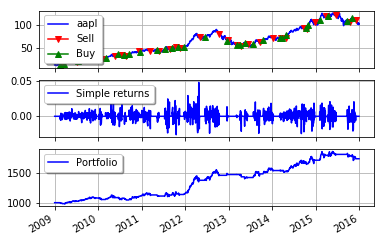

In [22]:
from pyalgotrade import plotter
from pyalgotrade.barfeed import quandlfeed
from pyalgotrade.stratanalyzer import returns


# Load the bar feed from the CSV file
feed = quandlfeed.Feed()
feed.addBarsFromCSV("aapl", "WIKI-AAPL-2009-quandl.csv")
feed.addBarsFromCSV("aapl", "WIKI-AAPL-2010-quandl.csv")
feed.addBarsFromCSV("aapl", "WIKI-AAPL-2011-quandl.csv")
feed.addBarsFromCSV("aapl", "WIKI-AAPL-2012-quandl.csv")
feed.addBarsFromCSV("aapl", "WIKI-AAPL-2013-quandl.csv")
feed.addBarsFromCSV("aapl", "WIKI-AAPL-2014-quandl.csv")
feed.addBarsFromCSV("aapl", "WIKI-AAPL-2015-quandl.csv")

# Evaluate the strategy with the feed's bars.
myStrategy = MyStrategy(feed, "aapl", 20, 30)

# Attach a returns analyzers to the strategy.
returnsAnalyzer = returns.Returns()
myStrategy.attachAnalyzer(returnsAnalyzer)

# Attach the plotter to the strategy.
plt = plotter.StrategyPlotter(myStrategy)
# Include the SMA in the instrument's subplot to get it displayed along with the closing prices.
#plt.getInstrumentSubplot("orcl").addDataSeries("SMA", myStrategy.getSMA())
# Plot the simple returns on each bar.
plt.getOrCreateSubplot("returns").addDataSeries("Simple returns", returnsAnalyzer.getReturns())

# Run the strategy.
myStrategy.run()
myStrategy.info("Final portfolio value: $%.2f" % myStrategy.getResult())

# Plot the strategy.
plt.plot()